In [19]:
import numpy as np 
import pandas as pd 
import os 
import cv2 as cv
from skimage.feature import hog
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from joblib import dump

In [20]:
from imblearn.over_sampling import RandomOverSampler

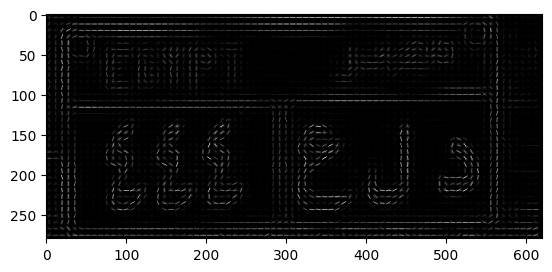

In [21]:
image_path = r"C:\Users\Twins\Documents\ShareX\Screenshots\2023-12\brave_T9ycxB9MYu.png"
img = cv.imread(image_path)
# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

describtor,Himg= hog(gray,orientations=9,pixels_per_cell=(8,8), cells_per_block=(1, 1),visualize=True)
plt.imshow(Himg,cmap='gray')

In [22]:
columns = ["images" , "label" ]
data = []
labels = []

In [23]:
dataset = 'dataset'
paths = os.listdir(dataset)
for path in paths:
    images = os.listdir('dataset/'+path)
    for img_path in images:
        img = cv.imread('dataset/'+path+"/"+img_path)
        img = cv.resize(img,(32,64))
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        describtor= hog(gray,orientations=9,pixels_per_cell=(8,8), cells_per_block=(1, 1))
        data.append((describtor).flatten())
        labels.append(path)

In [24]:
df= pd.DataFrame(data)
df["label"] = labels

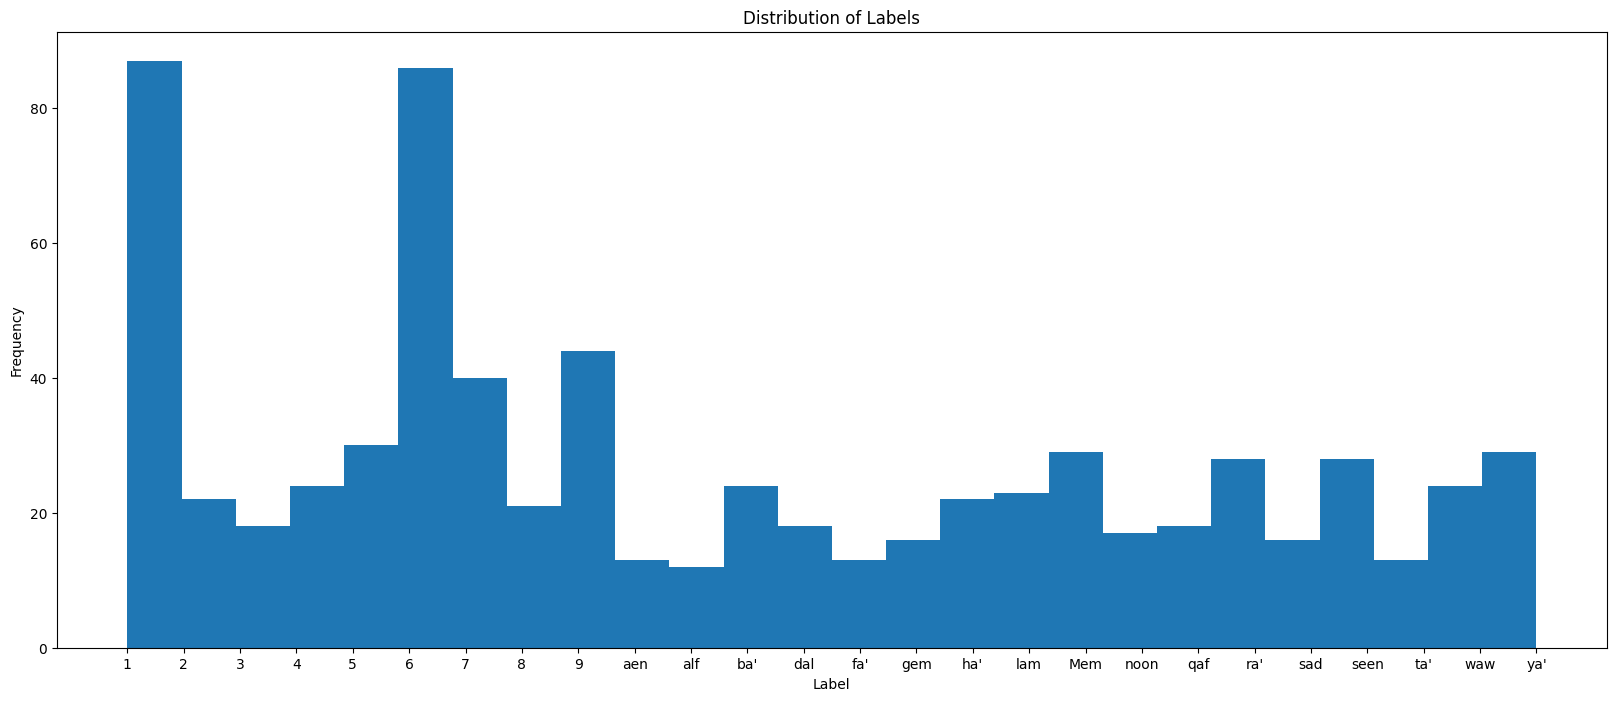

In [25]:
plt.figure(figsize = (20,8))
plt.hist(df["label"],bins=26,)
plt.xticks()
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Columns: 289 entries, 0 to label
dtypes: float64(288), object(1)
memory usage: 1.6+ MB


In [27]:
df = df.dropna(axis=1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Columns: 289 entries, 0 to label
dtypes: float64(288), object(1)
memory usage: 1.6+ MB


In [29]:
X = df.drop(columns='label')
y= df['label']

In [30]:
# over_sampler = RandomOverSampler(random_state=42)
# print("Before:",X.shape , y.shape)
# X,y  = over_sampler.fit_resample(X,y)
# print("After:",X.shape , y.shape)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.4,random_state=42
)

In [32]:



model = LogisticRegression(max_iter=700, n_jobs=-1)
model_svm = svm.SVC()

In [33]:
model.fit(X_train,y_train)
model_svm.fit(X_train,y_train)

SVC()

In [34]:
print(accuracy_score(y_train,model.predict(X_train)))
print(accuracy_score(y_train,model_svm.predict(X_train)))

1.0
1.0


In [35]:
model.score(X_test,y_test)
model_svm.score(X_test,y_test)

0.9755244755244755

In [36]:
dump(model, "data/trained_model.pkl")

['data/trained_model.pkl']